In [1]:
# PROGRAMMING NEURAL NETWORK IN PYTHON

In [2]:
# necessary libraries for TensorFlow, NumPy, and matplotlib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# creates a sequential model using Keras
model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [4]:
# loop iterates over the layers of the model, and for each layer, it retrieves the weights
for layer in model.layers:
    weights = layer.get_weights()
# ine assigns the value [0.6519221] to the weights
weights = np.array([[0.6519221]], dtype=np.float32)

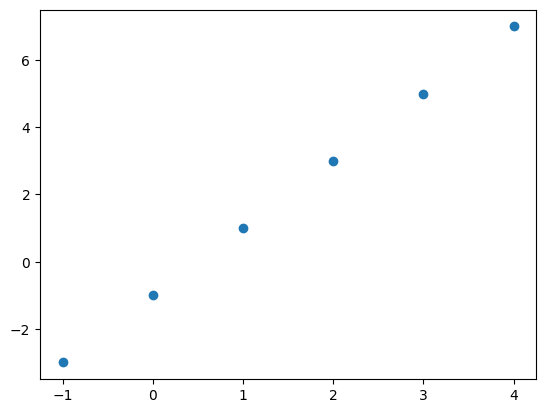

In [5]:
#  line compiles the model
# It specifies the optimizer as stochastic gradient descent ('sgd') and the loss function as mean squared error ('mse')
model.compile(optimizer='sgd', loss='mse')
# lines define the input (xs) and output (ys) data as arrays
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32)
#  line creates a scatter plot of the input (xs) and output (ys)
plt.scatter(xs, ys)

In [6]:
# line trains the model using the input (xs) and output (ys) data
# 500 epochs to update the model's weights
model.fit(xs, ys, epochs=500)
# line makes a prediction using the trained model for the input [10.0] and prints the predicted value
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 353ms/step - loss: 38.6669
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 30.7708
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 24.5513
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 19.6511
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 15.7889
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 12.7436
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 10.3411
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 8.4445
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 6.9460
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 5.7608
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 4.8223
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 4.0779
Epoch 13/500
1/1 [==============================] - 

In [7]:
# IMAGE PROCESSING

In [8]:
# Importing the required libraries: TensorFlow, Keras, NumPy, and Matplotlib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Loading the MNIST dataset, which contains handwritten digits
# split into training and testing sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalizing the pixel values of the images
# pixel values range from 0 to 1
(x_train, x_test) = (x_train / 255.0, x_test / 255.0)

10000


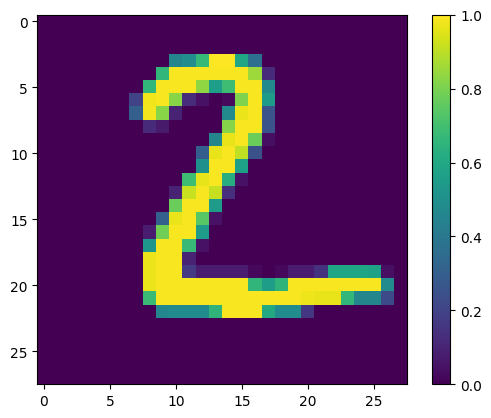

In [10]:
# Printing the length of the test set
print(len(x_test))
# Visualizing an example image from the test set
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Creating a sequential model using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
# Obtaining predictions for the first image in the training and test sets using the model
# Printing the length of the predictions for the first test image
prediction1 = model(x_train[:1]).numpy()
print(prediction1)
predictions1 = model(x_test[:1]).numpy()
print(predictions1)

[[-0.73794174 -0.08796141  0.90976655 -0.10635114 -0.00506014 -0.8966298
   0.34167746  0.41853282 -1.0580325   0.5303694 ]]
[[-0.10448848 -0.5179294   0.41433647 -0.19064264 -0.3658271  -0.5588805
   0.6356279   0.28557545 -0.09771593  0.07535919]]


In [13]:
# Applying the softmax function to the predictions to convert them into probabilities
unmodel = tf.nn.softmax(predictions1).numpy()
print(unmodel[0])

[0.08740636 0.057808   0.14684726 0.08019121 0.06730465 0.05548851
 0.18321942 0.12910576 0.08800033 0.10462847]


In [14]:
# Defining the loss function as sparse categorical cross-entropy.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Calculating the loss value for the first training image and storing it in the loss variable
loss = loss_fn(y_train[:1], prediction1).numpy()

In [15]:
# Compiling the model by specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1419 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0887 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0773 - accuracy: 0.9750
313/313 - 1s - loss: 0.0760 - accuracy: 0.9760 - 546ms/epoch - 2ms/step


[0.07603135704994202, 0.9760000109672546]

In [16]:
# creates a new sequential model called probability_model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# passes the first five images from the test set (x_test[:5]) through the probability_model
# prints the resulting probabilities for each class
print(probability_model(x_test[:5]))

tf.Tensor(
[[2.5586438e-08 4.5905554e-07 5.3411409e-06 5.5453397e-04 4.4996518e-10
  1.3007715e-07 7.0720759e-14 9.9943525e-01 1.3572809e-06 2.8905356e-06]
 [1.7120948e-10 3.4201923e-05 9.9981993e-01 1.3981285e-04 8.0148655e-15
  4.9578543e-06 8.0743018e-07 3.5687595e-11 2.5995070e-07 7.5709919e-14]
 [6.2967871e-08 9.9738985e-01 2.6293914e-04 4.6389479e-05 1.4409113e-04
  5.0257404e-06 2.5215413e-05 1.5846398e-03 5.4109073e-04 7.4692127e-07]
 [9.9996281e-01 1.5388614e-11 6.2773524e-06 2.1669302e-06 3.4853113e-07
  3.2403086e-06 1.3967989e-05 3.8483249e-06 9.9392764e-08 7.1451200e-06]
 [1.5096263e-06 2.6296931e-10 2.8927509e-06 1.9413926e-07 9.9909151e-01
  8.4018950e-07 6.5076131e-07 2.5435933e-05 3.9378797e-06 8.7295682e-04]], shape=(5, 10), dtype=float32)
